In [1]:
%%capture
%run receptor_tools_cycle_fluxes.ipynb

In [2]:
dG_house = {0: {1: 'a', 2: 'c', 4: 'f'}, 1: {0: 'A', 2: 'b'}, 2: {0: 'C', 1: 'B', 3: 'd'}, 3: {2: 'D', 4: 'e'}, 4: {3: 'E', 0: 'F'}}
dG_c3_handle = {0: {1: 'a', 2: 'c'}, 1: {0: 'A', 2: 'b'}, 2: {0: 'C', 1: 'B', 3: 'd'}, 3: {2: 'D'}}
dG_c4_chord = {0: {1: 'a', 2: 'c', 3: 'e'}, 1: {0: 'A', 2: 'b'}, 2: {0: 'C', 1: 'B', 3: 'd'}, 3: {0: 'E', 2: 'D'}}
dG_c3_tail = {0: {1: 'a', 2: 'C'}, 1: {0: 'A', 2: 'b'}, 2: {0: 'c', 1: 'B', 3: 'd'}, 3: {2: 'd'}}
dG_p2 = {0: {1: 'a'}, 1: {0: 'A'}}
dG_p3 = {0: {1: 'a'}, 1: {0: 'A', 2: 'b'}, 2: {1: 'B'}}
dG_p4 = {0: {1: 'a'}, 1: {0: 'A', 2: 'b'}, 2: {1: 'B', 3: 'c'}, 3: {2: 'C'}}
dG_c3 = {0: {1:'a', 2:'C'}, 1: {0:'A', 2:'b'}, 2: {0:'c', 1:'B'}}

dG = dG_c3 # choose graph here (dG may be used below)

G, Vg = graph_and_edge_ring_from_dict(dG)


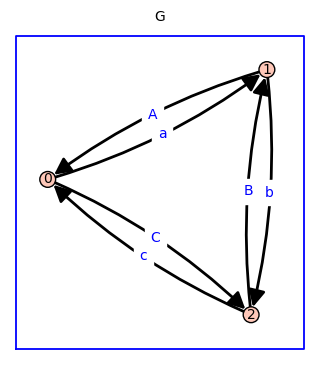


[-C - a      a      C]
[     A -b - A      b]
[     c      B -B - c]

For root/cycle [0] : A*B + b*c + A*c 

For root/cycle [1] : C*B + a*B + a*c 

For root/cycle [2] : C*b + a*b + C*A 

G cycles p: [(0, 1, 2, 0)] 

G cycles m: [(0, 2, 1, 0)] 

G cycles 2: [(0, 1, 0), (0, 2, 0), (1, 2, 1)] 


G cycle flux 0 : a * b * c

G cycle flux 1 : C * A * B

G cycle flux 2 : a * A * (B + c)

G cycle flux 3 : C * (b + A) * c

G cycle flux 4 : (C + a) * b * B



In [3]:
nvG, neG, betaG, Tg, TG, cycleG_p, cycleG_m, cycleG_2, cycleG, Jg, dict_vG, inverted_dict_vG, d_cycleG, inverted_d_cycleG =  cycle_flux_analysis(G,str='G')

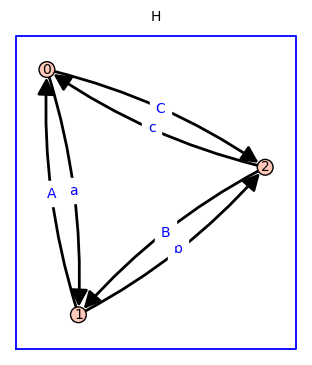


[-C - a      a      C]
[     A -b - A      b]
[     c      B -B - c]

For root/cycle [0] : A*B + b*c + A*c 

For root/cycle [1] : C*B + a*B + a*c 

For root/cycle [2] : C*b + a*b + C*A 

H cycles p: [(0, 1, 2, 0)] 

H cycles m: [(0, 2, 1, 0)] 

H cycles 2: [(0, 1, 0), (0, 2, 0), (1, 2, 1)] 


H cycle flux 0 : a * b * c

H cycle flux 1 : C * A * B

H cycle flux 2 : a * A * (B + c)

H cycle flux 3 : C * (b + A) * c

H cycle flux 4 : (C + a) * b * B



In [4]:
dH_c5 = {0: {1: 'v', 2: 'x', 4: 'Z'}, 1: {0: 'V', 2: 'w'}, 2: {1: 'W', 3: 'x'}, 3: {2: 'X', 4: 'y'}, 4: {0: 'z', 3: 'Y'}}
dH_c3 = {0: {1: 'x', 2: 'Z'}, 1: {0: 'X', 2: 'y'}, 2: {0: 'z', 1: 'Y'}}
dH_p4 = {0: {1: 'x'}, 1: {0: 'X', 2: 'y'}, 2: {1: 'Y', 3: 'z'}, 3: {2: 'Z'}}
dH_p3 = {0: {1: 'x'}, 1: {0: 'X', 2: 'y'}, 2: {1: 'Y'}}
dH_p2 = {0: {1: 'x'}, 1: {0: 'X'}}

dH_p2_r2 = {2: {3: 'x'}, 3: {2: 'X'}}
dH_c3_r3 = {3: {4: 'x', 5: 'Z'}, 4: {3: 'X', 5: 'y'}, 5: {3: 'z', 4: 'Y'}}
dH_p3_r3 = {3: {4: 'x'}, 4: {3: 'X', 5: 'y'}, 5: {4: 'Y'}}

dH = copy(dG);
#dH = dH_p2_r2

H, Vh = graph_and_edge_ring_from_dict(dH)
nvH, neH, betaH, Th, TH, cycleH_p, cycleH_m, cycleH_2, cycleH, Jh, dict_vH, inverted_dict_vH, d_cycleH, inverted_d_cycleH =  cycle_flux_analysis(H,str='H')

Multivariate Polynomial Ring in c, b, B, A, C, a over Integer Ring


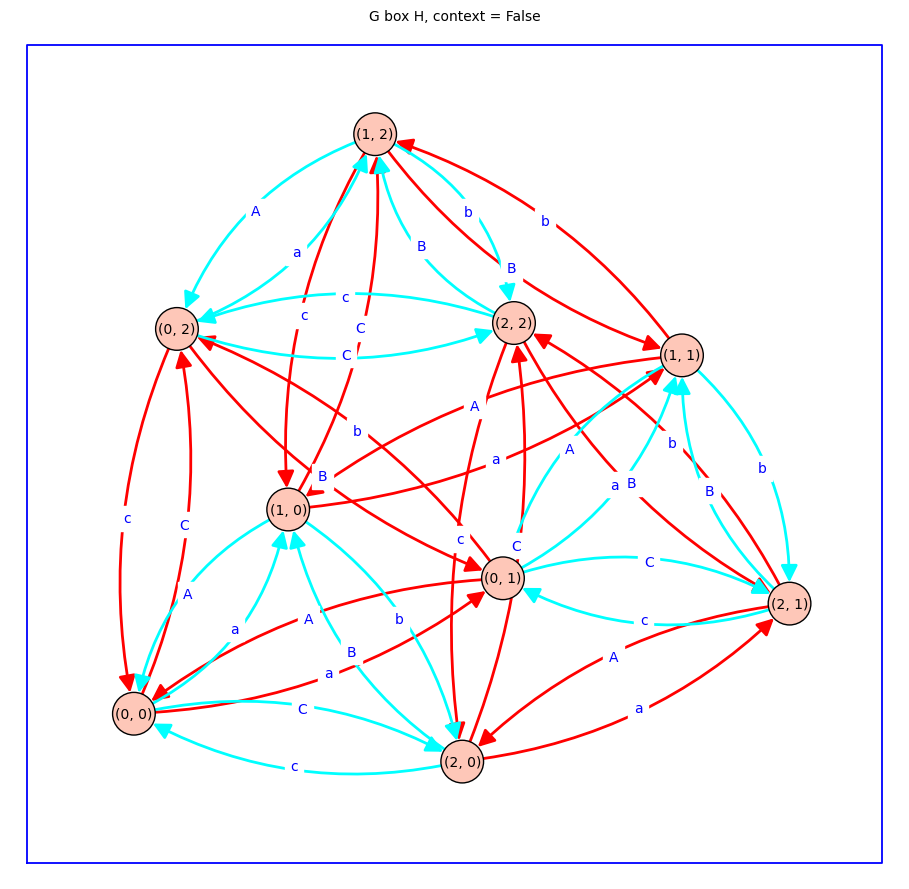

Multivariate Polynomial Ring in A2, C2, A1, a1, B2, C1, b2, b1, c1, a0, c0, b0, B1, c2, C0, a2, B0, A0 over Integer Ring


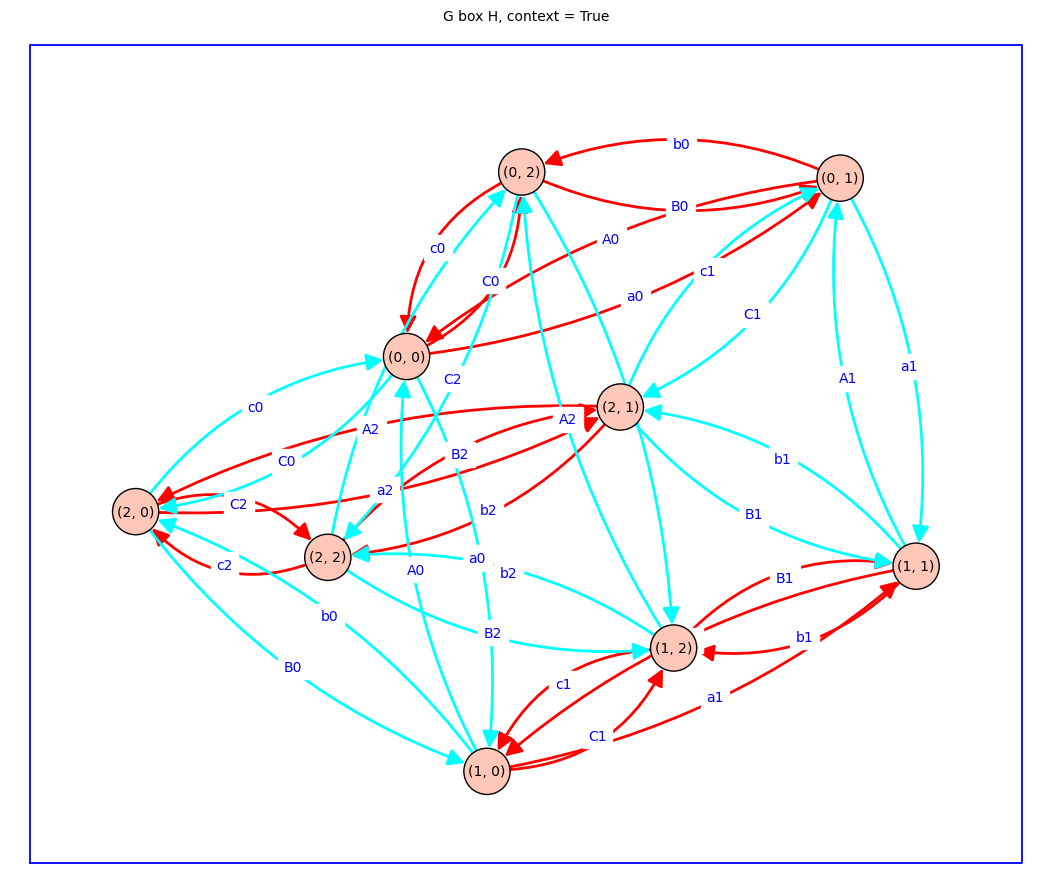

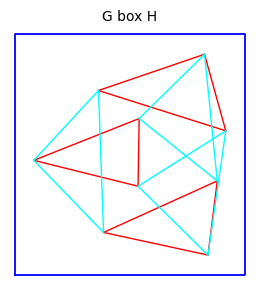

In [5]:
for context in [ False, True ]:
    GH = Cartesian_product(G, H, context=context)
    print(edge_ring_from_graph(GH))
    GH.show(edge_labels=True,figsize=12,graph_border=True,\
           edge_colors=cartesian_edge_color(GH,verbose=False),\
            title='G box H, context = ' + str(context))

GH0 = GH.to_undirected()
GH0.show(edge_labels=False,vertex_labels=False,vertex_size=0,figsize=4,graph_border=True,edge_colors=cartesian_edge_color(GH0,verbose=False),title='G box H')


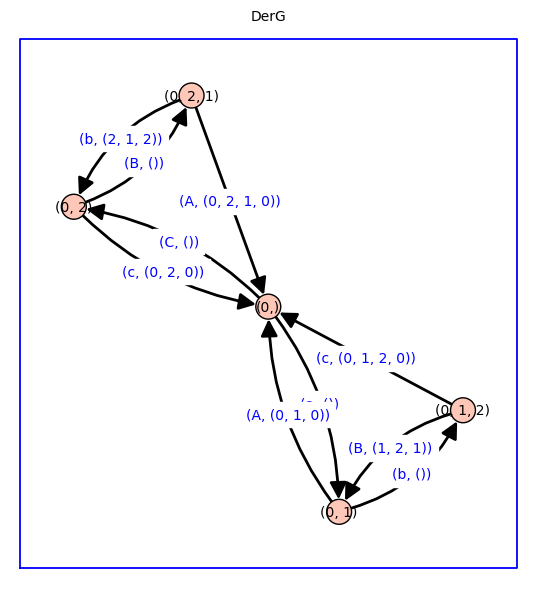

In [6]:
DerG = derived_graph(G)
DerG.show(edge_labels=True,figsize=8,graph_border=True,title='DerG')

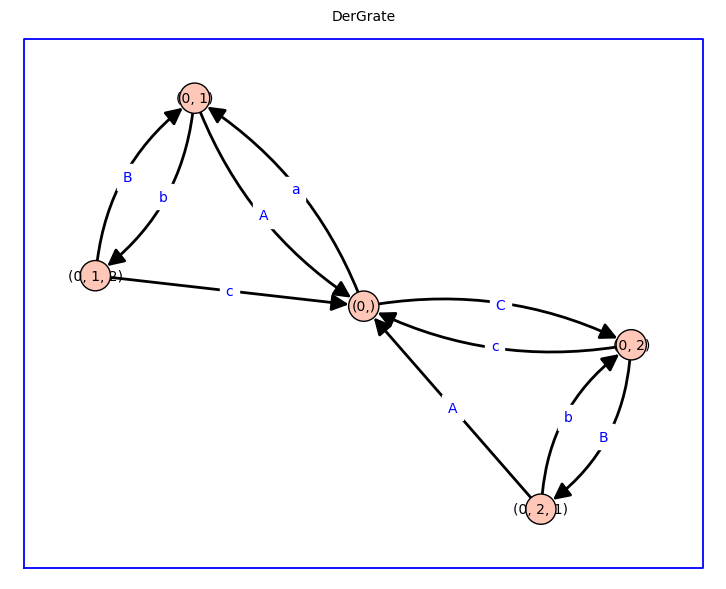

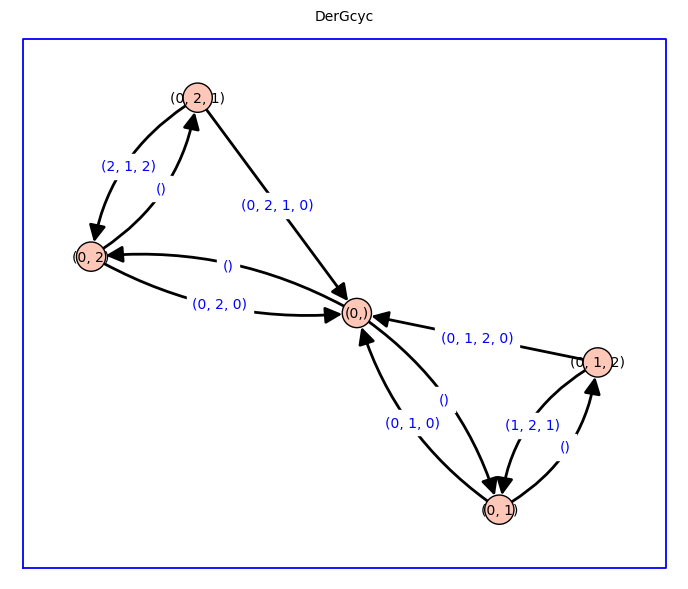

In [7]:
DerGrate, DerGcyc = split_derived_graph(DerG)
DerGrate.show(edge_labels=True,figsize=8,graph_border=True,title='DerGrate')
DerGcyc.show(edge_labels=True,figsize=8,graph_border=True,title='DerGcyc')

In [8]:
dict_Jg = cycle_fluxes_from_derived_graph(DerG,verbose=True)

rooted spanning tree of derived graph T(0,0) = (A*B + b*c + A*c) * (A*B + C*B + a*B + b*c + A*c + a*c + C*b + a*b + C*A) 

J (0, 1, 0) = a * A * (B + c) * (A*B + b*c + A*c) 

J (0, 1, 2, 0) = a * b * c * (A*B + b*c + A*c) 

J (1, 2, 1) = a * b * B * (A*B + b*c + A*c) 

J (0, 2, 0) = C * (b + A) * c * (A*B + b*c + A*c) 

J (0, 2, 1, 0) = C * A * B * (A*B + b*c + A*c) 

J (2, 1, 2) = C * b * B * (A*B + b*c + A*c) 



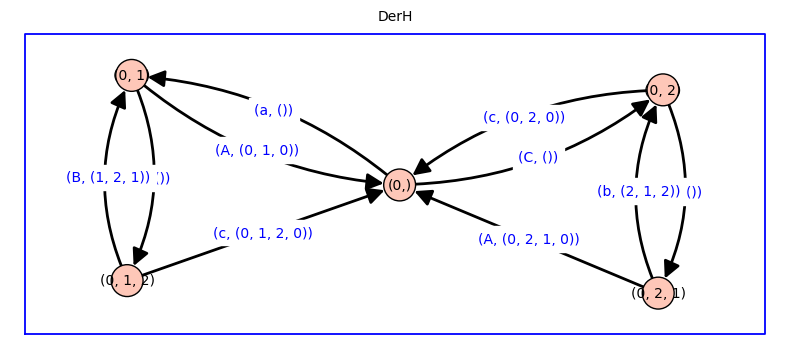

In [9]:
DerH = derived_graph(H)
DerH.show(edge_labels=True,figsize=8,graph_border=True,title='DerH')
DerHrate, DerHcyc = split_derived_graph(DerH)

In [10]:
dict_Jh = cycle_fluxes_from_derived_graph(DerH,verbose=True)

rooted spanning tree of derived graph T(0,0) = (A*B + b*c + A*c) * (A*B + C*B + a*B + b*c + A*c + a*c + C*b + a*b + C*A) 

J (0, 1, 0) = a * A * (B + c) * (A*B + b*c + A*c) 

J (0, 1, 2, 0) = a * b * c * (A*B + b*c + A*c) 

J (1, 2, 1) = a * b * B * (A*B + b*c + A*c) 

J (0, 2, 0) = C * (b + A) * c * (A*B + b*c + A*c) 

J (0, 2, 1, 0) = C * A * B * (A*B + b*c + A*c) 

J (2, 1, 2) = C * b * B * (A*B + b*c + A*c) 



***
*** context = False   reduce = False
***
Multivariate Polynomial Ring in c, b, B, A, C, a over Integer Ring


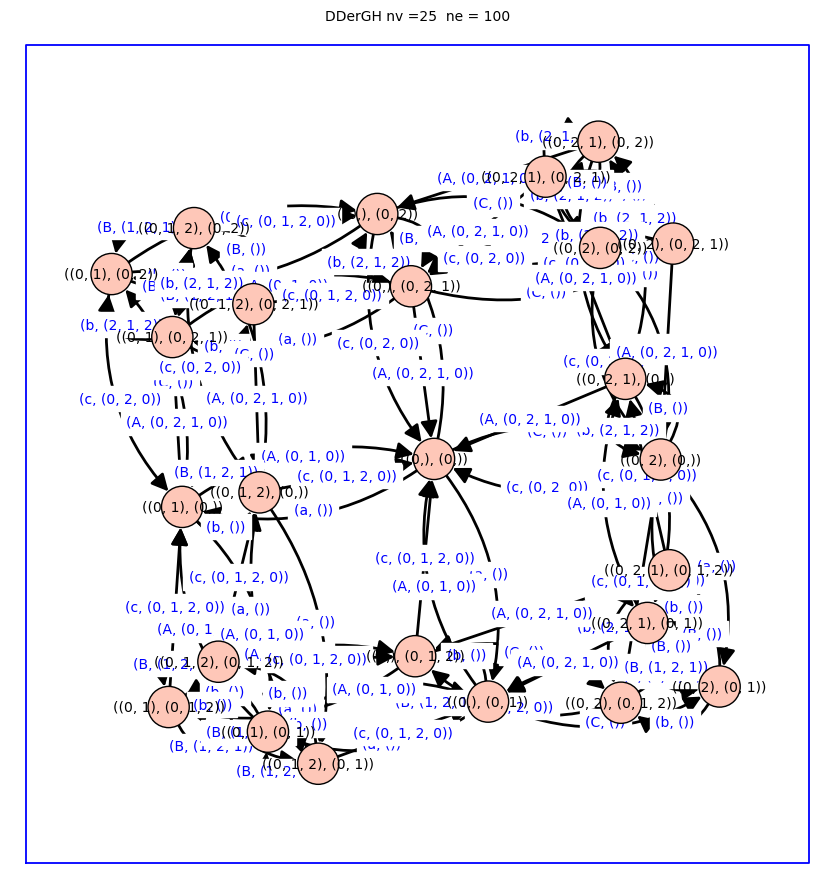

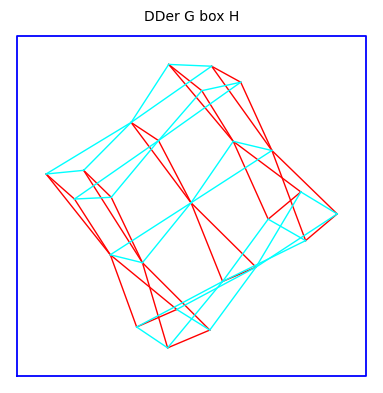

***
*** context = False   reduce = True
***
Multivariate Polynomial Ring in c, b, B, A, C, a over Integer Ring


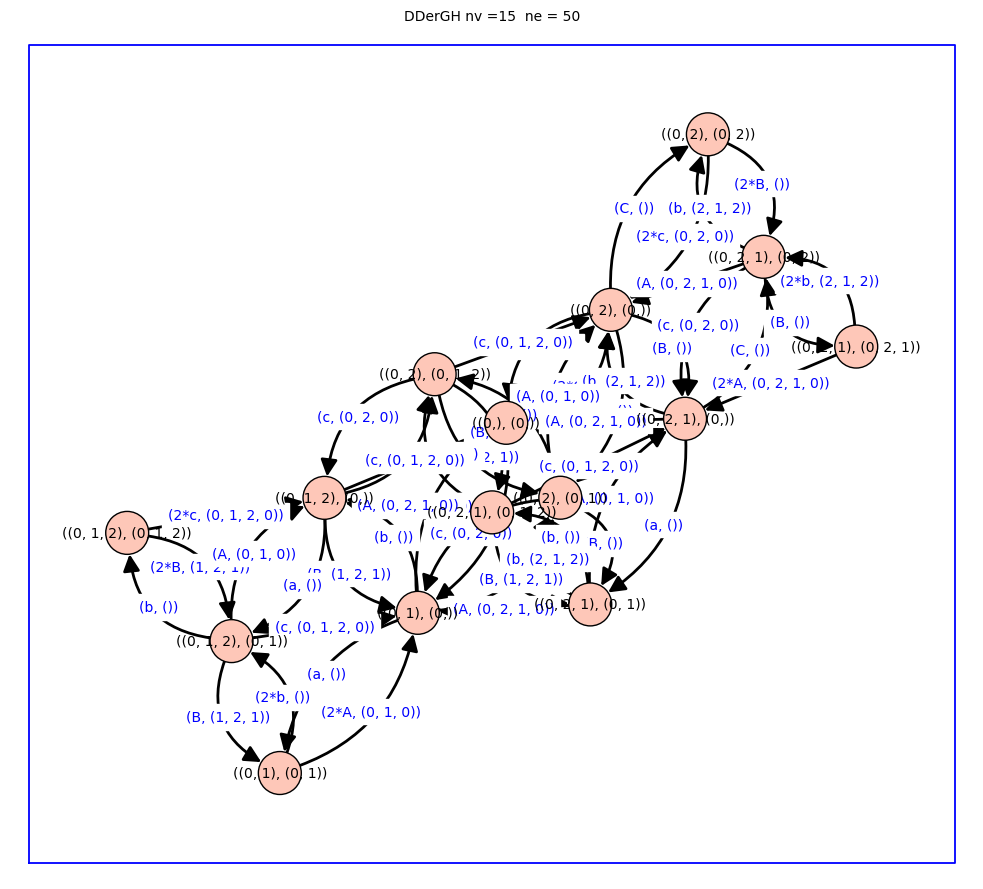

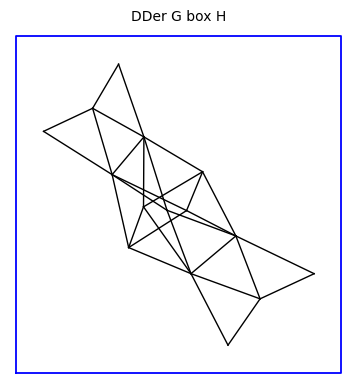

***
*** context = True   reduce = False
***
Multivariate Polynomial Ring in A2, C2, A1, a1, B2, C1, b2, b1, c1, a0, c0, b0, B1, c2, C0, a2, B0, A0 over Integer Ring


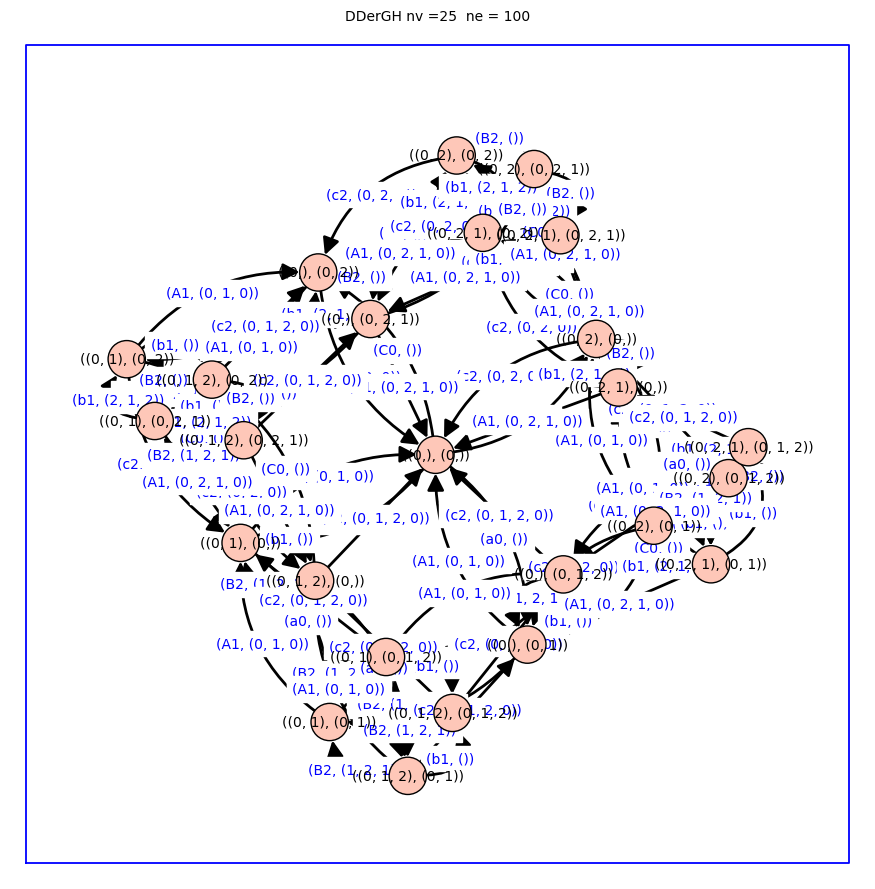

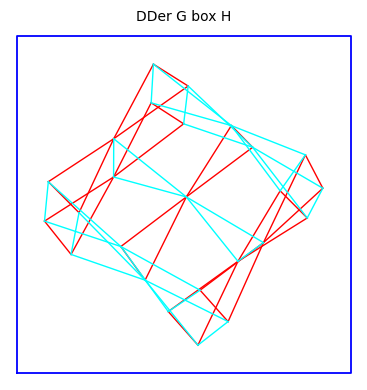

***
*** context = True   reduce = True
***
Multivariate Polynomial Ring in A2, C2, A1, a1, B2, C1, b2, b1, c1, a0, c0, b0, B1, c2, C0, a2, B0, A0 over Integer Ring


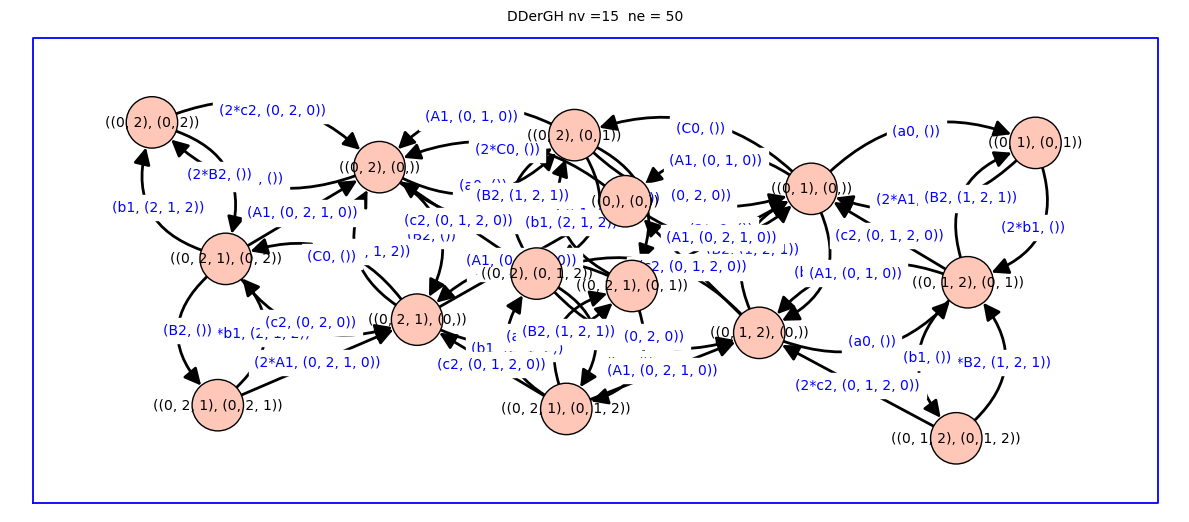

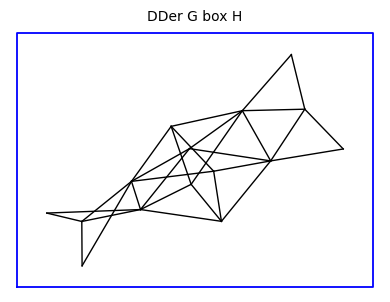

In [11]:
for context in [ False, True]:
    for reduce in [ False, True]:
        print('***')
        print('*** context =', str(context), '  reduce =', str(reduce))
        print('***')
        DDerGH = double_derived_graph(DerG,DerH,context=context,reduce=reduce)
        print(edge_ring_from_derived_graph(DDerGH))
        DDerGH.show(edge_labels=True,figsize=12,graph_border=True,\
                title='DDerGH '+'nv ='+str(DDerGH.order())+'  ne = '+str(DDerGH.size()))
        DDerGH0 = DDerGH.to_undirected()
        if reduce==False:
            edge_colors=cartesian_edge_color(DDerGH0,verbose=False)
        else:
            edge_colors=None
        DDerGH0.show(edge_colors=edge_colors,vertex_size=0,\
                     vertex_labels=False,graph_border=True,title='DDer G box H')

In [12]:
DDerGH = double_derived_graph(DerG,DerH,context=False,reduce=True)
dict_Jg_lumped_merge = cycle_fluxes_from_derived_graph(DDerGH,verbose=False,big=False)
for key in dict_Jg_lumped_merge:
    print(key,':',dict_Jg_lumped_merge[key],'\n')

(0, 1, 0) : 2^5 * a * A * (c + B) * (c + b + B + A) * (c + b + B + A + C + a) * (c*b + c*A + B*A)^2 * (c*b + c*A + B*A + b*C + B*C + A*C + c*a + b*a + B*a) * (4*c^3*b + 8*c^2*b^2 + 4*c*b^3 + 8*c^2*b*B + 8*c*b^2*B + 4*c*b*B^2 + 4*c^3*A + 16*c^2*b*A + 12*c*b^2*A + 12*c^2*B*A + 24*c*b*B*A + 4*b^2*B*A + 12*c*B^2*A + 8*b*B^2*A + 4*B^3*A + 8*c^2*A^2 + 12*c*b*A^2 + 16*c*B*A^2 + 8*b*B*A^2 + 8*B^2*A^2 + 4*c*A^3 + 4*B*A^3 + 6*c^2*b*C + 8*c*b^2*C + 2*b^3*C + 2*c^2*B*C + 12*c*b*B*C + 6*b^2*B*C + 4*c*B^2*C + 6*b*B^2*C + 2*B^3*C + 6*c^2*A*C + 16*c*b*A*C + 6*b^2*A*C + 16*c*B*A*C + 16*b*B*A*C + 10*B^2*A*C + 8*c*A^2*C + 6*b*A^2*C + 10*B*A^2*C + 2*A^3*C + 2*c*b*C^2 + 2*b^2*C^2 + c*B*C^2 + 4*b*B*C^2 + 2*B^2*C^2 + 2*c*A*C^2 + 4*b*A*C^2 + 5*B*A*C^2 + 2*A^2*C^2 + 2*c^3*a + 10*c^2*b*a + 10*c*b^2*a + 2*b^3*a + 6*c^2*B*a + 16*c*b*B*a + 6*b^2*B*a + 6*c*B^2*a + 6*b*B^2*a + 2*B^3*a + 8*c^2*A*a + 16*c*b*A*a + 4*b^2*A*a + 16*c*B*A*a + 12*b*B*A*a + 8*B^2*A*a + 6*c*A^2*a + 2*b*A^2*a + 6*B*A^2*a + c^2*C*a + 7*c*b*C*a 

In [13]:
DDerGH = double_derived_graph(DerG,DerH,context=True,reduce=True)
dict_Jg_lumped_merge = cycle_fluxes_from_derived_graph(DDerGH,verbose=False,big=False)
for key in dict_Jg_lumped_merge:
    print(key,':',dict_Jg_lumped_merge[key],'\n')

(0, 1, 0) : 2^5 * a0 * (B2 + c2) * A1 * (A1 + B2 + b1 + c2) * (A1 + B2 + b1 + a0 + c2 + C0) * (A1*B2 + A1*c2 + b1*c2)^2 * (A1*B2 + B2*a0 + b1*a0 + A1*c2 + b1*c2 + a0*c2 + A1*C0 + B2*C0 + b1*C0) * (4*A1^3*B2 + 8*A1^2*B2^2 + 4*A1*B2^3 + 8*A1^2*B2*b1 + 8*A1*B2^2*b1 + 4*A1*B2*b1^2 + 6*A1^2*B2*a0 + 8*A1*B2^2*a0 + 2*B2^3*a0 + 2*A1^2*b1*a0 + 12*A1*B2*b1*a0 + 6*B2^2*b1*a0 + 4*A1*b1^2*a0 + 6*B2*b1^2*a0 + 2*b1^3*a0 + 2*A1*B2*a0^2 + 2*B2^2*a0^2 + A1*b1*a0^2 + 4*B2*b1*a0^2 + 2*b1^2*a0^2 + 4*A1^3*c2 + 16*A1^2*B2*c2 + 12*A1*B2^2*c2 + 12*A1^2*b1*c2 + 24*A1*B2*b1*c2 + 4*B2^2*b1*c2 + 12*A1*b1^2*c2 + 8*B2*b1^2*c2 + 4*b1^3*c2 + 6*A1^2*a0*c2 + 16*A1*B2*a0*c2 + 6*B2^2*a0*c2 + 16*A1*b1*a0*c2 + 16*B2*b1*a0*c2 + 10*b1^2*a0*c2 + 2*A1*a0^2*c2 + 4*B2*a0^2*c2 + 5*b1*a0^2*c2 + 8*A1^2*c2^2 + 12*A1*B2*c2^2 + 16*A1*b1*c2^2 + 8*B2*b1*c2^2 + 8*b1^2*c2^2 + 8*A1*a0*c2^2 + 6*B2*a0*c2^2 + 10*b1*a0*c2^2 + 2*a0^2*c2^2 + 4*A1*c2^3 + 4*b1*c2^3 + 2*a0*c2^3 + 2*A1^3*C0 + 10*A1^2*B2*C0 + 10*A1*B2^2*C0 + 2*B2^3*C0 + 6*A1^2*b1*C0 +